# Lesson 8a: Scikit-Learn
Scikit-learn is a powerful set of tools and techniques for various machine learning (ML) tasks, including classification, regression, clustering, dimensionality reduction, model selection, and data preprocessing.

By the end of this lesson, you should have a basic understanding of some of the most common ML techniques as well as how to implement and apply them in Python with scikit-learn.

For more information about the other ML techniques as well as more details about those methods discussed here, check out the scikit-learn API: https://scikit-learn.org/stable/modules/classes.html#.

## Learning objectives 
1. What is machine learning?
2. Applying `pre-processors` and `transformers` to manipulate and transform input data.
3. Fitting and evaluating an `estimator` on your data.


## Introduction to Machine Learning
Before we dive into various ML techniques and applying them to actual data, let's first introduce some datasets that we'll be using throughout this lesson and some basic ML notions. Datasets can come in various forms and shapes, and the same data can typically be applied to many different learning algorithms. Fortunately, scikit-learn has a few standard datasets built in that we'll be using: the `iris` dataset, the `digits` dataset, and the `diabetes` dataset. Let's examine the `iris` dataset briefly to introduce some basic concepts.

In [202]:
# Load the iris dataset
from sklearn import datasets
iris = datasets.load_iris()

# Look at the features
print(type(iris.data), iris.data.shape)
print(iris.data[:5, :])

# Look at the target variables
print(type(iris.target), iris.target.shape)
print(iris.target_names)

<class 'numpy.ndarray'> (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
<class 'numpy.ndarray'> (150,)
['setosa' 'versicolor' 'virginica']


The datasets in scikit-learn are dictionary-like objects that contain the data and some metadata. The data itself is stored in the `.data` attribute, and as seen above, the `iris` data is stored as a numpy array of size (150, 4). This corresponds to 150 plants and 4 measurements per plant, forming the "design matrix" that is typically of the size `(n_samples, n_features)`. The 150 samples correspond to 150 plants that span 3 different iris species: setosa, versicolor, virginica. These species define our **target variables** and are also stored in a numpy array of size (150,). Values in this array are integers (0, 1, or 2) corresponding to the species of the plant. **Features** are attributes or predictors of a sample that are assumed to be predictive for a specific task. For example, the 4 features of the `iris` dataset correspond to sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm). A physical visualization of these features can be seen below: 

![Iris Dataset](iris-dataset.png) 

We can also visualize the distributions of the data and pair-wise scatterplots. (Which features might be the most predictive of iris species? Which might be the least predictive?)

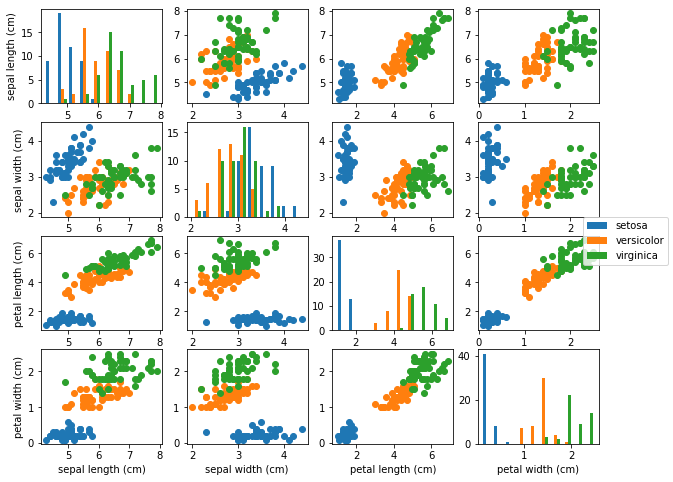

In [203]:
import numpy as np
import matplotlib.pyplot as plt

def pair_plot(data, labels, feature_names, label_names, size=(10, 8)):

    # Get shape info of data
    assert len(data.shape) == 2
    n_samples = data.shape[0]
    n_feats = data.shape[1]

    # Separate data and labels based on classes
    unique_ys = np.unique(labels)
    X_sep, y_sep = [], []
    for unique_y in unique_ys:
        X = [data[i, :] for i in range(n_samples) if labels[i] == unique_y]
        X_sep.append(np.stack(X))

        y = [labels[i] for i in range(n_samples) if labels[i] == unique_y]
        y_sep.append(np.stack(y))

    # Plot the pair components
    fig = plt.figure(figsize=size)
    for i in range(n_feats):
        for j in range(n_feats):
            # If on diagonal, then plot a histogram
            if i == j:
                plt.subplot(n_feats, n_feats, n_feats*i+j+1)
                plt.hist([X[:,j] for X in X_sep])
            # If off diagonal, then plot a scatter plot
            else:
                plt.subplot(n_feats, n_feats, n_feats*i+j+1)
                for X in X_sep:
                    plt.scatter(X[:, j], X[:, i])
            # If on left most column, add ylabel
            if j == 0:
                plt.ylabel(feature_names[i])
            # If on bottom most row, add xlabel
            if i == n_feats-1:
                plt.xlabel(feature_names[j])
    
    # Add legend and show
    fig.legend([label_name for label_name in label_names], loc='center right')
    plt.show()

pair_plot(iris.data, iris.target, iris.feature_names, iris.target_names)


A typical ML problem for this dataset might be defined as follows: **Given the measurements of sepal length, sepal width, petal length, and petal width from an iris plant, predict the specific iris species of that plant**.

The problem defined above falls into the category of **supervised learning**, whereby we use the features of an example to predict a certain target variable for that example. In our iris dataset example, the target variable is species. Because our target variable falls into one of 3 distinct classes (setosa, versicolour, or virginica), this is also a **classification** problem, wherein we try to predict a <u>qualitative</u> value or assign an example to a specific class. Another supervised learning problem is **regression**, wherein we try to predict a <u>quantitative</u> value for an example. For the iris plants, one might imagine using the same measurements to try to predict the age of the plant. (Of course, we'd need a new dataset for this problem. Why?)

Another category of ML problems is **unsupervised learning**. Here, the task is a little less defined and more ambiguous. In theory, the idea is to learn about some patterns and/or structure within the data without the use of a specific target variable. For example, imagine we were just given `iris.data` and there were no `iris.target`. We can then use an unsupervised learning approach, such as clustering, to try to figure out if there is any structure to our data. Clustering, for instance, attempts to form groups of examples that are grouped based on similarity, wherein more similar examples are grouped together and dissimilar examples are in separate groups. 

Note that a ML technique or algorithm <u>does not</u> have to cleanly fit into one of these categories. There are many examples of methods that combine supervised and unsupervised learning as well as regression and classification. 

The goal of ML is learn some properties of a dataset and apply these learned properties to unseen or new data. In this mindset, we want to learn something about the data we have that is generalizable to future data. In order to approximate how well our model or technique is performing, it is standard to create a **training set** and a **testing set**. The training set is the data that the model or ML technique actually sees and can learn from. The testing set is then used to see how well the learned properties correspond to real unseen data. Scikit-learn has a convenient utility function to do just this:

In [204]:
from sklearn.model_selection import train_test_split

# Get our features and targets
X, y = iris.data, iris.target

# Shuffle and split our dataset with 25% of it going to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Examine the shapes of the split dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(112, 4) (38, 4)
(112,) (38,)


## Preprocessing Data

Unfortunately, real world data isn't as clean as the datasets that we can load from `sklearn.datasets`. Fortunately, there are some built-in data preprocessing utilities that we can use to help us prepare our data for various ML techniques. Here we'll briefly introduce five of these utilities: the `StandardScaler`, the `Normalizer`, the `OrdinalEncoder`, the `KBinsDiscretizer`, and `PolynomialFeatures`. 

(Note that in these examples, `.fit()` and then `.transform()` is used. An alternative to this would be the `.fit_transform()` method which fits and transforms the data and the same time.)

### StandardScaler

Standardization is a typical requirement for many ML techniques as they assume the data looks standard normally distributed. While the true distribution is commonly not Gaussian, we often ignore this and just center the data by subtracting the mean for each feature and scaling them by their standard deviation. This can be easily accomplished with the `StandardScaler`.

The `StandardScaler` must be "fit" to data using the `.fit()` method. This method will compute the mean and standard deviation of the input data and store these within the `StandardScaler` object. These values can then be used to transform the input data and any other data with the `.transform()` method. (Should we create two different `StandardScaler` and scale the training and testing set separately? Why or why not?)

In [205]:
from sklearn import preprocessing
import numpy as np

# Create some fake training data
X_train = np.array([[1., -1.,  2.],
                    [2.,  0.,  0.],
                    [0.,  1., -1.]])
print('Original data mean:', X_train.mean(axis=0))
print('Original data std dev:', X_train.std(axis=0))

# Create the StandardScaler and fit to the data
scaler = preprocessing.StandardScaler().fit(X_train)

# View the stored scaling values
print('Mean: ', scaler.mean_)
print('Std. dev: ', scaler.scale_)

# Apply the same transformation to other data
X_scaled = scaler.transform(X_train)

# Verify the result
print('Scaled data mean:', X_scaled.mean(axis=0))
print('Scaled data std dev:', X_scaled.std(axis=0))

Original data mean: [1.         0.         0.33333333]
Original data std dev: [0.81649658 0.81649658 1.24721913]
Mean:  [1.         0.         0.33333333]
Std. dev:  [0.81649658 0.81649658 1.24721913]
Scaled data mean: [0. 0. 0.]
Scaled data std dev: [1. 1. 1.]


### Normalization

Normalization another common technique and involves scaling individual samples to have unit norm. This is useful for techniques that utilize a quadratic form or applying kernels to quantify similarity between pairs of samples and normalization is a base assumption for certain techniques.

The `Normalizer` can be used to easily transform samples based on various norms including the $\ell_{1}$ , $\ell_{2}$, and max norms. When creating the `Normalizer`, it does not need the `.fit()` method (though it can be used, this method doesn't do anything because the class is stateless). The `.transform()` method can then be used to normalize any data. (Should we create two different `Normalizer` and normalize the training and testing set separately? Why or why not?)

In [206]:
# Create some fake training data
X_train = [[1., -1.,  2.],
           [2.,  0.,  0.],
           [0.,  1., -1.]]

# Create l2 Normalizer (fit does nothing)
normalizer_l2_fit = preprocessing.Normalizer(norm='l2').fit(X_train)
normalizer_l2 = preprocessing.Normalizer(norm='l2')

# Transform based on l2 norm
X_norm1 = normalizer_l2_fit.transform(X_train)
X_norm2 = normalizer_l2.transform(X_train)
print('L2 Normalized:')
print(X_norm1)
print(X_norm2)
print()

# Can also create l1 and max norm Normalizer
normalizer_l1 = preprocessing.Normalizer(norm='l1')
normalizer_max = preprocessing.Normalizer(norm='max')

# Transform based on l1 and max norms
X_l1 = normalizer_l1.transform(X_train)
print('L1 Normalized:')
print(X_l1)
print()

X_max = normalizer_max.transform(X_train)
print('Max Normalized:')
print(X_max)

L2 Normalized:
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]

L1 Normalized:
[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]

Max Normalized:
[[ 0.5 -0.5  1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -1. ]]


### OrdinalEncoder

Commonly some features are not continuous or even quantitative values, but rather categorical. For example, a person could be from ["North Carolina", "South Carolina", "Georgia", "Virginia", "Florida", etc.]. These features can be conveniently transformed to a new feature of integers from 0 to n_categories-1. (Why can't we just use the original categorical features?)

The `OrdinalEncoder` can be used to efficiently transform any input categorical features. Like the other `preprocessors`, we use the `.fit()` and `.transform()` methods to do the transformation. There is additional methods to perform the inverse transformation.

In [207]:
# Create fake training data
X = [['Male', 1], ['Female', 3], ['Female', 2]]

# Create encoder
encoder = preprocessing.OrdinalEncoder().fit(X)

# View the encoding categories
print('Categories:', encoder.categories_)

# Transform new data
X_encoded = encoder.transform([['Female', 3], ['Male', 1]])
print('Encoded data:', X_encoded)

# Perform inverse transformation
print('Inverse transformation:', encoder.inverse_transform([[1, 0], [0, 1]]))


Categories: [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
Encoded data: [[0. 2.]
 [1. 0.]]
Inverse transformation: [['Male' 1]
 ['Female' 2]]


### K-Bins Discretization

Discretization is a common technique where by continuous values are binned or partitioned into discrete values. One-hot encoded discretized features, for example, can make some models more expressive.

The `KBinsDiscretizer` can be used to easily discretize features into $k$ bins. The actual encoding of the features can be set as a parameter and as default is one-hot encoding. (Here we also show 'ordinal' encoding). Like the other `preprocessors`, the `KBinsDiscretizer` can be `.fit()` and then can use `.transform()` to discretize features. Note that when using one-hot encoding, the output will be stored in a sparse matrix representation.

In [208]:
# Create fake data
X = np.array([[-3., 5.],
              [ 0., 6.]])

# One hot encoding
one_hot_binner = preprocessing.KBinsDiscretizer(n_bins=[3, 2]).fit(X)
X_one_hot = one_hot_binner.transform(X)
print('One hot encoding:', X_one_hot)

# Ordinal encoding
ordinal_binner = preprocessing.KBinsDiscretizer(n_bins=[3, 2], encode='ordinal').fit(X)
X_ordinal = ordinal_binner.transform(X)
print('Ordinal encoding:', X_ordinal)

One hot encoding:   (0, 0)	1.0
  (0, 3)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
Ordinal encoding: [[0. 0.]
 [2. 1.]]


### Polynomial Features

Often, higher order and interaction terms of the features can be useful for many ML techniques. These can be easily acquired via `PolynomialFeatures`. In the example below, features of a sample $(X_{1}, X_{2})$ are transformed to $(1, X_{1}, X_{2}, X_{1}^{2}, X_{1}X_{2}, X_{2}^{2})$.

In [209]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create fake data
X = np.arange(6).reshape(3, 2)
print(X)

# Create PolynomialFeatures
poly = PolynomialFeatures(2)

# Transform the features
X_poly = poly.fit_transform(X)
print(X_poly)

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


## Machine Learning Algorithms

Let's dive into some common machine learning algorithms, specifically linear regression, logistic regression, k-nearest neighbors, support vector machines, and random forests. Before we get started, let's load some datasets. We'll be using the `iris` dataset that we introduced earlier for various classification tasks. For regression tasks, we'll be using the `diabetes` dataset. For both these datasets, we'll use a training/testing split of 75%/25%.

In [210]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Construct training and testing sets for iris dataset
iris = datasets.load_iris()
X_clf, y_clf = iris.data, iris.target
X_clf_trn, X_clf_tst, y_clf_trn, y_clf_tst = train_test_split(X_clf, y_clf, test_size=0.25, shuffle=True)

# Construct training and testing sets for diabetes dataset
diabetes = datasets.load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target
X_reg_trn, X_reg_tst, y_reg_trn, y_reg_tst = train_test_split(X_reg, y_reg, test_size=0.25, shuffle=True)

### Linear Regression

Linear regression is a classic machine learning algorithm that fits a linear combination of the features to a continuous value. As the name says, this technique is for regression problems, and as such, we'll be applying it to the `diabetes` dataset. The basic form of linear regression attempts to find good coefficient values for a model of the form:
$$ y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \dots + \beta_{p} X_{p} + \varepsilon,$$
where $y$ is the regression target, $\beta_{i}$ for $i \in \{0 \dots p\}$ are the regression coefficients, $X_{i}$ for $i \in \{1 \dots p\}$ are the features, and $\varepsilon$ is the irreducible error.

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform the regression
lin_reg = LinearRegression().fit(X_reg_trn, y_reg_trn)

# Predict on test set
y_pred = lin_reg.predict(X_reg_tst)

# MSE
print('Mean squared error: \n %.2f' % mean_squared_error(y_reg_tst, y_pred))
# Coefficient of determination (R^2)
print('R squared: \n %.2f' % r2_score(y_reg_tst, y_pred))

Mean squared error: 
 2424.09
R squared: 
 0.52


### Logistic Regression

Logistic regression is another classic machine learning algorithm that fits a linear combination of the features to a continuous value within the range of 0 and 1. However, unlike as the name suggests, this technique is used for classification problems, and as such, we'll be applying it to the `iris` dataset. The basic form of logistic regression attempts to find good coefficient values for a model of the form:
$$ \frac{p(X)}{1-p(X)} = e^{\beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \dots + \beta_{p} X_{p} + \varepsilon},$$
where $p(X)$ is the probability of $X$, $\beta_{i}$ for $i \in \{0 \dots p\}$ are the regression coefficients, $X_{i}$ for $i \in \{1 \dots p\}$ are the features, and $\varepsilon$ is the irreducible error.

In [212]:
from sklearn.linear_model import LogisticRegression

# Perform the logistic regression
log_reg = LogisticRegression(random_state=0).fit(X_clf_trn, y_clf_trn)

# Predict on test set
y_pred = log_reg.predict(X_clf_tst)

# Mean accuracy
print('Mean accuracy: \n', log_reg.score(X_clf_tst, y_clf_tst))

Mean accuracy: 
 1.0


/home/nzrandolph/.miniconda3/envs/hlc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbors

K-nearest neighbors is a simple non-parametric machine learning algorithm. As suggested by the name, when the algorithm sees a new example, it then looks at the $k$ closest neighbors (based on some distance metric) to determine a value for the example. The determined value depends if the problem is a classification problem or a regression problem. For classification, the method takes a simple majority vote to assign a class. For regression, the method typically takes an average of the value of the $k$ neighbors.

#### K-Nearest Neighbors Classifier

In [213]:
from sklearn.neighbors import KNeighborsClassifier

# Get the classifier
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_clf_trn, y_clf_trn)

# Predict on test set
y_pred = knn_clf.predict(X_clf_tst)

# Mean accuracy
print('Mean accuracy: \n %.2f' % knn_clf.score(X_clf_tst, y_clf_tst))

Mean accuracy: 
 1.00


#### K-Nearest Neighbors Regressor

In [214]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Get the regressor
knn_reg = KNeighborsRegressor(n_neighbors=5).fit(X_reg_trn, y_reg_trn)

# Predict on test set
y_pred = knn_reg.predict(X_reg_tst)

# Mean squared error
print('Mean squared error: \n %.2f' % mean_squared_error(y_reg_tst, y_pred))
# Coefficient of determination
print('R squared: \n %.2f' % knn_reg.score(X_reg_tst, y_reg_tst))

Mean squared error: 
 3371.64
R squared: 
 0.33


### Support Vector Machine

Support vector machines are supervised learning models that were originally built for classification. For classification, it attempts to fit n_classes-1 hyperplanes between the n_classes classes while maximizing the width of the gap between classes. A regression version of the SVM was later proposed.

#### Support Vector Classifier

In [215]:
from sklearn.svm import SVC

# Create the support vector classifier with linear kernel
svc_1 = SVC(kernel='linear').fit(X_clf_trn, y_clf_trn)

# Create the support vector classifier with RBF kernel
svc_2 = SVC(kernel='rbf').fit(X_clf_trn, y_clf_trn)

# Predict on test set
y_pred_1 = svc_1.predict(X_clf_tst)
y_pred_2 = svc_2.predict(X_clf_tst)

# Mean accuracy
print('Mean accuracy (linear): \n %.2f' % svc_1.score(X_clf_tst, y_clf_tst))
print('Mean accuracy (rbf): \n %.2f' % svc_2.score(X_clf_tst, y_clf_tst))

Mean accuracy (linear): 
 1.00
Mean accuracy (rbf): 
 0.95


#### Support Vector Regressor

In [216]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create the support vector regressor with linear kernel
svr_1 = SVR(kernel='linear').fit(X_reg_trn, y_reg_trn)

# Create the support vector regressor with RBF kernel
svr_2 = SVR(kernel='rbf').fit(X_reg_trn, y_reg_trn)

# Predict on test set
y_pred_1 = svr_1.predict(X_reg_tst)
y_pred_2 = svr_2.predict(X_reg_tst)

# MSE
print('Mean squared error (linear): \n %.2f' % mean_squared_error(y_reg_tst, y_pred_1))
print('Mean squared error (rbf): \n %.2f' % mean_squared_error(y_reg_tst, y_pred_2))

# Coefficient of determination, R^2
print('R squared (linear): \n %.2f' % svr_1.score(X_reg_tst, y_reg_tst))
print('R squared (rbf): \n %.2f' % svr_2.score(X_reg_tst, y_reg_tst))

Mean squared error (linear): 
 5282.97
Mean squared error (rbf): 
 4429.20
R squared (linear): 
 -0.05
R squared (rbf): 
 0.12


### Random Forests

Random forests are ensemble-based machine learning algorithms that fit many different decision trees to the data, with each tree restricted to a subset of predictors. Both classification and regression versions of random forests have been implemented in `scikit-learn`.

#### Random Forest Classifier

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Build the random forest
rf_clf = RandomForestClassifier().fit(X_clf_trn, y_clf_trn)

# Predict on test set
y_pred = rf_clf.predict(X_clf_tst)

# Accuracy metric
print('Mean accuracy: \n %.2f' % accuracy_score(y_clf_tst, y_pred))

Mean accuracy: 
 0.97


#### Random Forest Regressor

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Build the random forest
rf_reg = RandomForestRegressor().fit(X_reg_trn, y_reg_trn)

# Predict on test set
y_pred = rf_reg.predict(X_reg_tst)

# MSE
print('Mean squared error: \n %.2f' % mean_squared_error(y_reg_tst, y_pred))
# Coefficient of determination
print('R squared: \n %.2f' % rf_reg.score(X_reg_tst, y_reg_tst))

Mean squared error: 
 3128.73
R squared: 
 0.38


# In class exercises

1. Load the breast cancer dataset with the `load_breast_cancer()` function in `sklearn.datasets`. What type of machine learning problem is this and what are the target variables? How many samples are there? How many features per sample?

2. Use the `pair_plot` function defined above to plot pair wise scatter plots for the first 5 features. Which features seem to be most correlated with one another and why? Which features seem to have the most class separation and why?

3. Apply an appropriate ML method (from those mentioned above) to this dataset with a 80/20 train/test split. How well does your model perform on the test data? (See if you can do any better by manipulating some parameters, adding preprocessing, using a different number of features, and/or using different methods) (For additional arguments to the methods, check out the API: https://scikit-learn.org/stable/modules/classes.html#)